# 1. Create script to read share data for required stocks

In [1]:
# Import required libraries for to read share
import pandas as pd
from pandas_datareader import data as web
import datetime
import kaleido

In [3]:
# Set time to look at the stock trading information
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
# Get origin stock data from yahoo, ticker symbol is ORG.AX
org = web.DataReader("ORG.AX", 'yahoo', start, end)
org

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-03,4.930,4.71,4.71,4.90,5524711.0,4.150702
2016-01-04,4.880,4.73,4.87,4.83,5718988.0,4.091407
2016-01-05,4.790,4.58,4.79,4.71,6846296.0,3.989757
2016-01-06,4.645,4.29,4.56,4.35,10624829.0,3.684807
2016-01-07,4.460,4.26,4.26,4.44,10001706.0,3.761044
...,...,...,...,...,...,...
2022-08-15,6.090,6.00,6.03,6.06,3060034.0,6.060000
2022-08-16,6.125,6.02,6.10,6.04,3333978.0,6.040000
2022-08-17,6.090,5.98,6.06,6.07,3201553.0,6.070000


## Data Definitions in a Data Dictionary
1.	‘Open’ is the price of the stock at the beginning of the trading day
2.	‘high’ is the highest price of the stock on that trading day
3.	‘low’ the lowest price of the stock on that trading day
4.	’close‘ the price of the stock at closing time. 
5.  'Volume' indicates how many stocks were traded. 
6.	‘Adjusted’ close is the closing price of the stock that adjusts the price of the stock for corporate actions.

In [6]:
# Check data. A quick view on the data
org.isnull().values.any()
org.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1679.000000,1679.000000,1679.000000,1679.000000,1.679000e+03,1679.000000
mean,6.590569,6.438624,6.512933,6.515497,6.119395e+06,5.852204
std,1.598335,1.589246,1.591837,1.594141,3.060487e+06,1.303484
min,3.760000,3.440000,3.500000,3.460000,0.000000e+00,2.930904
25%,5.210000,5.070000,5.150000,5.140000,4.086859e+06,4.739844
50%,6.540000,6.380000,6.460000,6.470000,5.453689e+06,5.907632
75%,7.700000,7.555000,7.625000,7.625000,7.331869e+06,6.730876
max,10.270000,10.075000,10.190000,10.150000,3.109029e+07,8.805061


2. Visualizing Stock Data 

 2.1 Line Chart

In [5]:
# Import matplotlib for creating charts
import matplotlib.pyplot as plt
# To make the plot appear in a Jupyter notebook
%matplotlib inline
# Set default figure size, font color
%pylab inline
pylab.rcParams['figure.figsize'] = (15,9)
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
plotfontcolor = 'white'
mpl.rcParams['text.color'] = plotfontcolor
mpl.rcParams['axes.labelcolor'] = plotfontcolor
mpl.rcParams['xtick.color'] = plotfontcolor
mpl.rcParams['ytick.color'] = plotfontcolor
matplotlib.rcParams.update({'font.size': 18})

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='Date'>

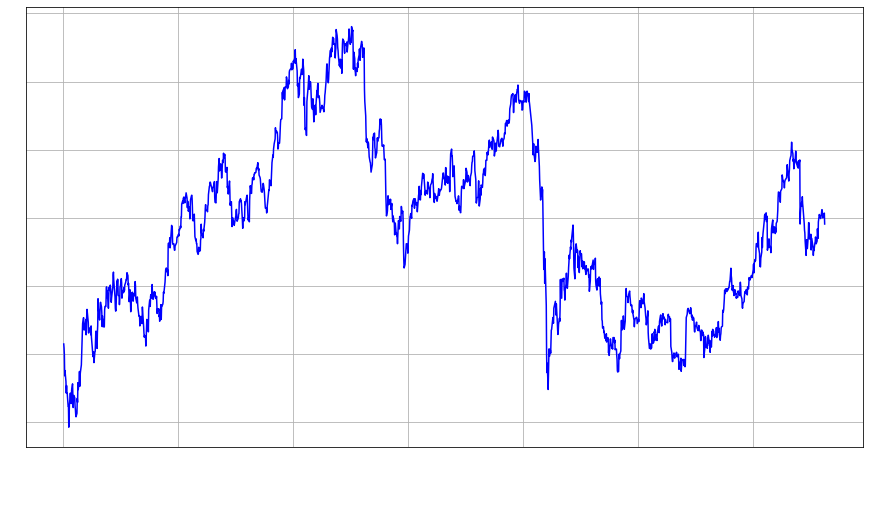

In [6]:
# Plot the basic price line chart by using adjusted closing price
org['Adj Close'].plot(grid=True)

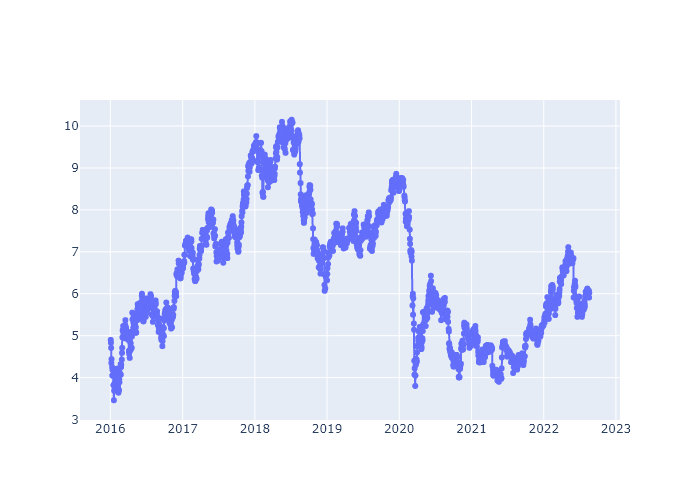

In [7]:
# An alternative way to create line chart by using plotly.graph_objects
import plotly.graph_objects as go

fig1 = go.Figure(data=go.Scatter(x=org.index,y=org['Close'], mode='lines+markers'))
fig1.show('png')

# Line chart + volume bars
In second chart I've add bar charts to show the volume of trading.


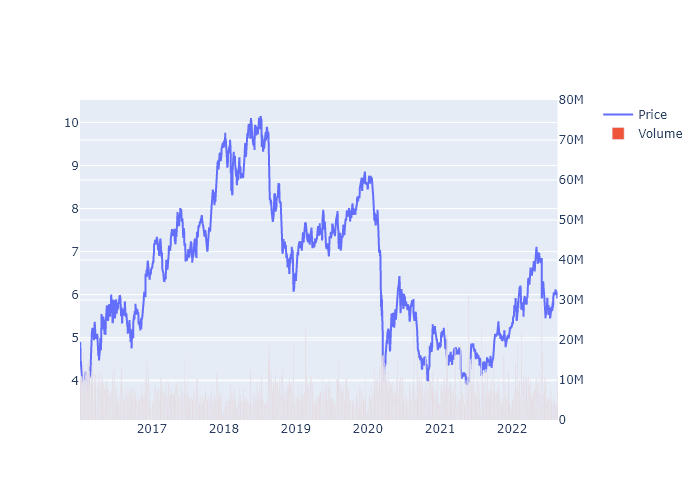

In [8]:
# Add volumn bars as second axis
import plotly.graph_objects as go

from plotly.subplots import make_subplots

fig1_2 = make_subplots(specs=[[{"secondary_y": True}]])
fig1_2.add_trace(go.Scatter(x=org.index,y=org['Close'],name='Price'),secondary_y=False)
fig1_2.add_trace(go.Bar(x=org.index,y=org['Volume'],name='Volume'),secondary_y=True)
fig1_2.update_yaxes(range=[0,80000000],secondary_y=True,color="#444")
#fig1_2.update_yaxes(visible=False, secondary_y=True)
fig1_2.show("png")

    2.2 Candlestick Plot

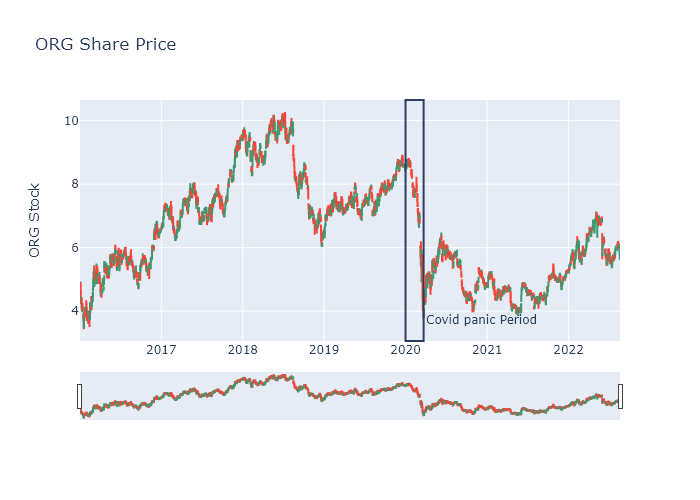

In [9]:
# Apply candlestick chart function 
fig2 = go.Figure(data=[go.Candlestick(x=org.index,
                open=org.Open, high=org.High,
                low=org.Low, close=org.Close)])

# Adding Customized Text and Annotations
fig2.update_layout(
    title='ORG Share Price',
    yaxis_title='ORG Stock',
    shapes = [dict(
        x0='2020-1-1', x1='2020-03-22', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-03-22', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Covid panic Period')]
)

fig2.show("png")

# Candlestick chart + 200 day moving average



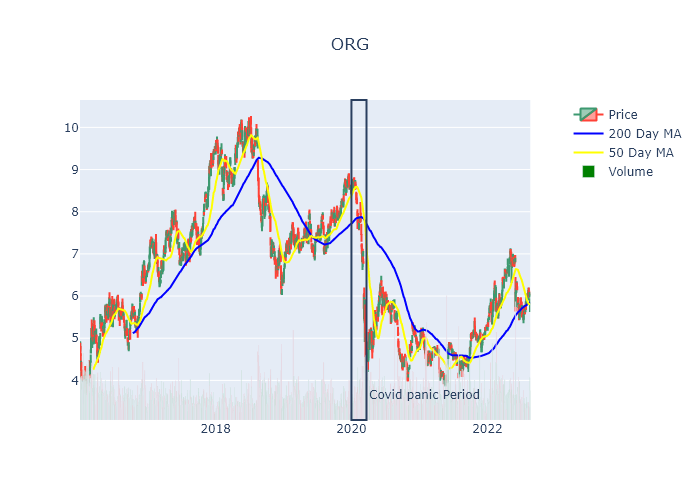

In [10]:
# Combine moving average, volumn and candlestick chart, first, create candlestick chart agian as new fig3
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=org.index,
                              open=org['Open'],
                              high=org['High'],
                              low=org['Low'],
                              close=org['Close'],
                              name='Price'))

# Change volumn bar color by adding new column called 'color' - green for up days, and red for down days
org['diff'] = org['Close'] - org['Open']
org.loc[org['diff']>=0, 'color'] = 'green'
org.loc[org['diff']<0, 'color'] = 'red'


# Use rolling()method to provide moving windows, then get the average of the moving window by using mean() at the end of rolling function
fig3.add_trace(go.Scatter(x=org.index,y=org['Close'].rolling(window=200).mean(),marker_color='blue',name='200 Day MA'))
fig3.add_trace(go.Scatter(x=org.index,y=org['Close'].rolling(window=50).mean(),marker_color='Yellow',name='50 Day MA'))
fig3.add_trace(go.Bar(x=org.index, y=org['Volume'], name='Volume', marker={'color':org['color']}),secondary_y=True)
# Adjust axis size, label to make it looker better 
fig3.update_yaxes(range=[0,80000000],secondary_y=True)
fig3.update_yaxes(visible=False, secondary_y=True)
fig3.update_layout(xaxis_rangeslider_visible=False)  #hide range slider
fig3.update_layout(title={'text':'ORG', 'x':0.5})

# Add same annotations from previous line chart
fig3.update_layout(
    shapes = [dict(
        x0='2020-1-1', x1='2020-03-22', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2020-03-22', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Covid panic Period')])
fig3.show("png")

2.3 Compare with multiple financial instruments

In [11]:
# Import AGL energy and ASX to compare with ORG share
agl = web.DataReader("AGL.AX", "yahoo", start, end)
asx = web.DataReader("^AXJO", "yahoo", start, end)

# Comparing ORG share with competitors and ASX


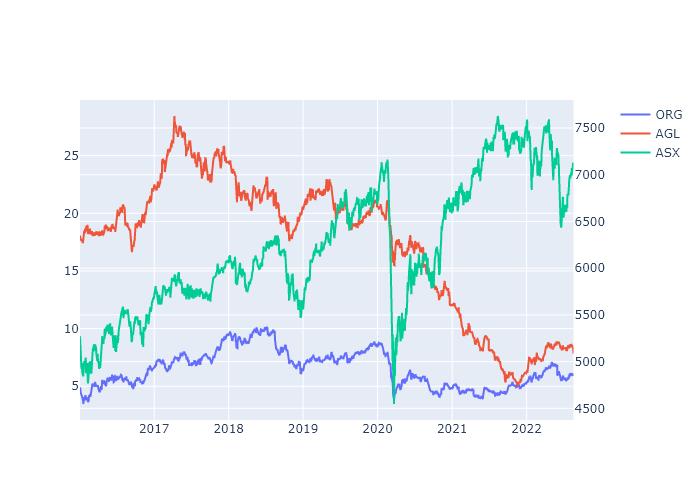

In [12]:
#Add org and agl line chart on same axis since they have similar price
#fig4= go.Figure(data=go.Scatter(x=org.index,y=org.Close, mode='lines+markers',name='ORG'))
#fig4.add_scatter(x=agl.index,y=agl.Close, mode='lines+markers',name='AGL')
#Add ASX to secondary y axis since its price is much higher than the two energy shares
from plotly.subplots import make_subplots
fig4 = make_subplots(specs=[[{"secondary_y": True}]])
fig4.add_trace(go.Scatter(x=org.index,y=org['Close'],name='ORG'),secondary_y=False)
fig4.add_trace(go.Scatter(x=agl.index,y=agl['Close'],name='AGL'),secondary_y=False)
fig4.add_scatter(x=asx.index,y=asx.Close, mode='lines',name='ASX',secondary_y=True)

#fig4.add_trace(go.Scatter(x=agl.index,y=agl['Close'],name='Price',mode='lines+markers'),secondary_y=False)

fig4.show("png")